In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [135]:
df=pd.read_csv('coronavirus.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [137]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [138]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [139]:
df['Date'].dtype

dtype('O')

In [140]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
23683   2020-05-26
23684   2020-05-26
23685   2020-05-26
23686   2020-05-26
23687   2020-05-26
Name: Date, Length: 23688, dtype: datetime64[ns]

In [141]:
df['Date'].dtype

dtype('<M8[ns]')

In [142]:
df["Day"]= df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

In [143]:
df.drop('Date',axis=1,inplace=True)

In [144]:
df

,Country,Confirmed,Recovered,Deaths,Day,Month,Year
0,Afghanistan,0,0,0,22,1,2020
1,Albania,0,0,0,22,1,2020
2,Algeria,0,0,0,22,1,2020
3,Andorra,0,0,0,22,1,2020
4,Angola,0,0,0,22,1,2020
...,...,...,...,...,...,...,...
23683,West Bank and Gaza,429,365,3,26,5,2020
23684,Western Sahara,9,6,1,26,5,2020
23685,Yemen,249,10,49,26,5,2020
23686,Zambia,920,336,7,26,5,2020


In [145]:
df.describe()

,Confirmed,Recovered,Deaths,Day,Month,Year
count,2.368800e+04,23688.000000,23688.000000,23688.000000,23688.000000,23688.0
mean,7.969368e+03,2581.801714,526.935030,15.968254,3.261905,2020.0
std,5.842109e+04,15143.101257,3992.815956,8.730660,1.242007,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2020.0
25%,0.000000e+00,0.000000,0.000000,8.000000,2.000000,2020.0
50%,1.800000e+01,1.000000,0.000000,16.000000,3.000000,2020.0
75%,7.300000e+02,123.000000,13.000000,24.000000,4.000000,2020.0
max,1.680913e+06,384902.000000,98913.000000,31.000000,5.000000,2020.0


In [146]:
df.isnull().sum()

Country      0
Confirmed    0
Recovered    0
Deaths       0
Day          0
Month        0
Year         0
dtype: int64

<AxesSubplot:>

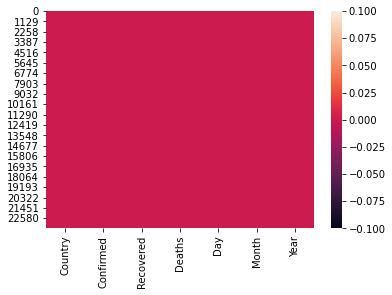

In [147]:
sns.heatmap(df.isnull())

No null values are present.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    23688 non-null  object
 1   Confirmed  23688 non-null  int64 
 2   Recovered  23688 non-null  int64 
 3   Deaths     23688 non-null  int64 
 4   Day        23688 non-null  int64 
 5   Month      23688 non-null  int64 
 6   Year       23688 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
le=LabelEncoder()

In [151]:
df_col=['Country']
for col in df_col:
    df[col]=le.fit_transform(df[col])    

In [152]:
df

,Country,Confirmed,Recovered,Deaths,Day,Month,Year
0,0,0,0,0,22,1,2020
1,1,0,0,0,22,1,2020
2,2,0,0,0,22,1,2020
3,3,0,0,0,22,1,2020
4,4,0,0,0,22,1,2020
...,...,...,...,...,...,...,...
23683,183,429,365,3,26,5,2020
23684,184,9,6,1,26,5,2020
23685,185,249,10,49,26,5,2020
23686,186,920,336,7,26,5,2020


In [153]:
df.corr()

,Country,Confirmed,Recovered,Deaths,Day,Month,Year
Country,1.000000e+00,0.069204,0.019298,0.064954,-2.078548e-17,-1.068063e-18,NaN
Confirmed,6.920426e-02,1.000000,0.810991,0.929718,5.020675e-03,1.408603e-01,NaN
Recovered,1.929830e-02,0.810991,1.000000,0.778094,1.122037e-02,1.872444e-01,NaN
Deaths,6.495418e-02,0.929718,0.778094,1.000000,3.872599e-03,1.401759e-01,NaN
Day,-2.078548e-17,0.005021,0.011220,0.003873,1.000000e+00,-2.378462e-01,NaN
Month,-1.068063e-18,0.140860,0.187244,0.140176,-2.378462e-01,1.000000e+00,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

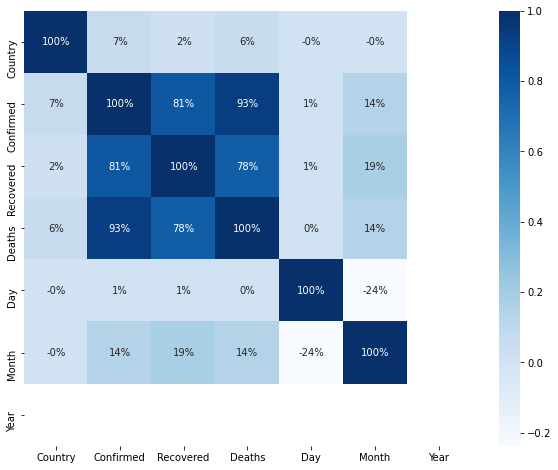

In [154]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='Blues')

Confirmed, recovered and death are highly correlated with each other.

Country         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Confirmed    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Recovered    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Deaths          AxesSubplot(0.125,0.391471;0.227941x0.222059)
Day          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Month        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Year               AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

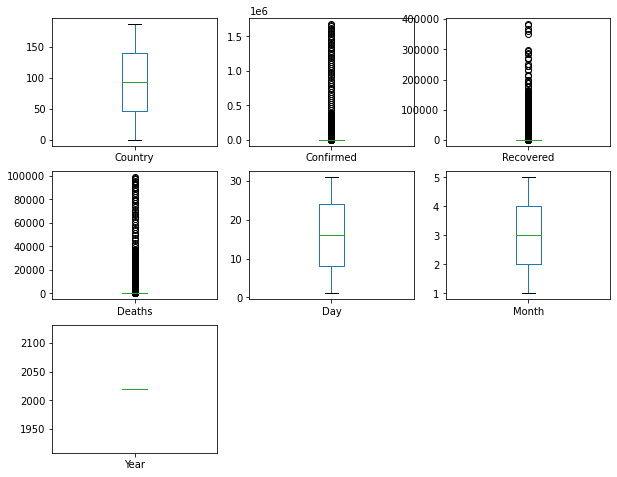

In [155]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,8))

In [156]:
df.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
Day          -0.068932
Month        -0.107605
Year          0.000000
dtype: float64

In [157]:
y=df['Deaths']
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23688, dtype: int64

In [158]:
x=df.drop('Deaths',axis=1)
x

,Country,Confirmed,Recovered,Day,Month,Year
0,0,0,0,22,1,2020
1,1,0,0,22,1,2020
2,2,0,0,22,1,2020
3,3,0,0,22,1,2020
4,4,0,0,22,1,2020
...,...,...,...,...,...,...
23683,183,429,365,26,5,2020
23684,184,9,6,26,5,2020
23685,185,249,10,26,5,2020
23686,186,920,336,26,5,2020


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=67)

In [162]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [163]:
model=[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),SVR()]


In [164]:
for m in model:
    m.fit(x_train,y_train)
    print('Score of:',m,'is',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print('Error')
    print('Mean absolute error',mean_absolute_error(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred))
    print('/n')
    print('**************************************************************************')


Score of: LinearRegression() is 0.865573957329863
Error
Mean absolute error 252.72098290316347
Mean squared error 1780623.6340385526
Root mean squared error 1334.4001026823075
R2 Score 0.8685429281894207
/n
**************************************************************************
Score of: Lasso() is 0.8655737066045441
Error
Mean absolute error 251.79483188094525
Mean squared error 1780592.5658001676
Root mean squared error 1334.3884613560504
R2 Score 0.8685452218462981
/n
**************************************************************************
Score of: Ridge() is 0.8655739522656343
Error
Mean absolute error 252.72890664208975
Mean squared error 1780608.168923107
Root mean squared error 1334.3943078877048
R2 Score 0.8685440699235597
/n
**************************************************************************
Score of: DecisionTreeRegressor() is 1.0
Error
Mean absolute error 23.60405234276066
Mean squared error 53183.46053186999
Root mean squared error 230.6153952620466
R2 Score 0.

DecisionTreeRegressor is the best model with r2 score of .99

In [165]:
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=4,scoring='r2')
print('Score:',score)
print('Mean Score:',score.mean())
print('Standard deviation:',score.std())

Score: [0.24811595 0.81763428 0.60788044 0.65124332]
Mean Score: 0.5812184964968058
Standard deviation: 0.20764396264195545


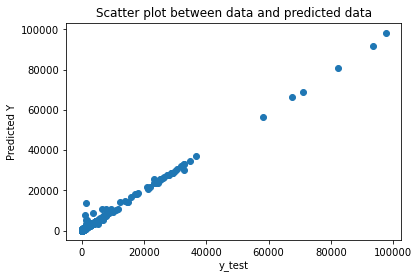

In [166]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
plt.scatter(y_test,preddtr)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title('Scatter plot between data and predicted data')
plt.show()


In [167]:
import pickle

In [168]:
filename='Covid-19.pkl'
pickle.dump(dtr,open('Covid-19.pkl','wb'))